In [1]:
import sys
import os

os.chdir('../')
import src.scrape_apk as scraper
# import src.create_matrices as cm
# import src.model as model

# import src.Malware_Types as mt





In [2]:
from scipy.sparse import lil_matrix, csr_matrix,save_npz,load_npz
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from random import sample
import json

In [3]:
apps_removed = [1,3,5,10,20]
num_apis = [411743,196019,134957,63349,29241]
execution_time = [4052.6092898845673,2857.644499063492,2852.6119272708893,2733.2097828388214,2292.928766489029]
remove_apis = pd.DataFrame([apps_removed, num_apis, execution_time]).T
remove_apis.columns = ['App threshold','APIs remaining', 'Execution time']

In [4]:
remove_apis

,App threshold,APIs remaining,Execution time
0,1.0,411743.0,4052.609290
1,3.0,196019.0,2857.644499
2,5.0,134957.0,2852.611927
3,10.0,63349.0,2733.209783
4,20.0,29241.0,2292.928766


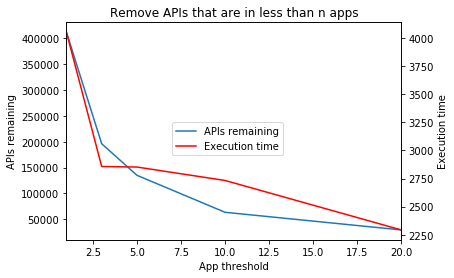

In [12]:
ax = remove_apis.plot(x="App threshold", y="APIs remaining", legend=False)
ax.set_ylabel('APIs remaining')
ax2 = ax.twinx()
remove_apis.plot(x="App threshold", y="Execution time", ax=ax2, legend=False, color="r")
ax2.set_ylabel('Execution time')
ax.figure.legend(loc = 10)
ax.set_title('Remove APIs that are in less than n apps')
plt.show()

In [13]:
actual_train = pd.read_csv('data/Matrix_data/training_labels.csv', names = ['Actual'])
actual_test = pd.read_csv('data/Matrix_data/testing_labels.csv', names = ['Actual'])

In [15]:
predicted_df = pd.read_csv('data/output/preds_original.csv', names = ['Predicted'])

In [16]:
apps = json.load(open('data/apps/test_apps.json'))
apps_switched = {v:k for k,v in apps.items()}

In [17]:
test = pd.concat([actual_test, predicted_df], axis = 1)
test['Name'] = test.index.map(apps_switched)
test['App_ID'] = test.index

In [18]:
test.loc[test.Actual != test.Predicted]

,Actual,Predicted,Name,App_ID
9,0,4,wooing-adult-dating-free-local-dating-finder,9
37,0,4,whatsalon-go,37
54,0,1,case-paper,54
75,0,2,decathlon-utility,75
84,1,4,d0b7d7cf6833148f94a91c25c2546891,84
92,2,0,ee4181d171005aaf528f013bbf4a778c,92
96,2,4,536fb61b7f152c89b5f0134953b66fd7,96
97,2,1,0e17c4ba54e2fd4828ffd60510840fd1,97
101,2,0,5ee082a737625e7d93ba0bf142e3e1b8,101
166,3,1,5def139ff1c5b9ddc8c9be6004d727f2,166


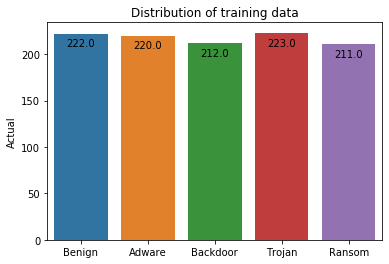

In [31]:
train_counts = actual_train['Actual'].value_counts().sort_index().to_frame()
train_counts.index = ['Benign','Adware','Backdoor','Trojan','Ransom']
ax = sns.barplot(x = train_counts.index, y = 'Actual', data = train_counts)
ax.set_title('Distribution of training data')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, -10), textcoords = 'offset points')

In [20]:
def create_pie_chart(d,l,a):
    dict_df = pd.DataFrame.from_dict(d, orient='index')
    fig1, ax1 = plt.subplots()
    ax1.pie(dict_df, labels=dict_df.index, autopct='%1.1f%%',startangle=a)
    ax1.set_title('Training data - {} App distribution'.format(l));


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


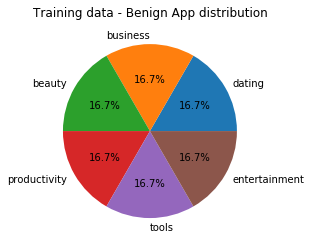

In [21]:
benign_dist = {'dating':50,"business":50, "beauty":50,"productivity":50,"tools":50,"entertainment":50}
create_pie_chart(benign_dist,'Benign',0)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


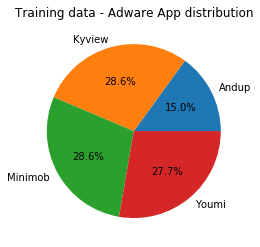

In [22]:
ad_dist = {'Andup':33,'Kyview':63,'Minimob':63,'Youmi':61}
create_pie_chart(ad_dist,'Adware',0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


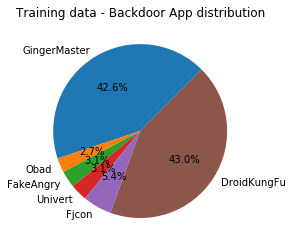

In [23]:
backdoor_dict = {'GingerMaster':95,'Obad':6,'FakeAngry':7,'Univert':7,'Fjcon':12,'DroidKungFu':96}
create_pie_chart(backdoor_dict,'Backdoor',45)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


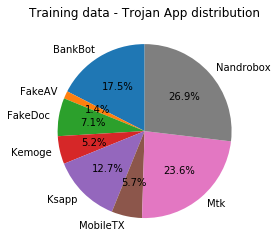

In [24]:
trojan_dict = {'BankBot':37,'FakeAV':3,'FakeDoc':15,'Kemoge':11,'Ksapp':27,'MobileTX':12,'Mtk':50,'Nandrobox':57}
create_pie_chart(trojan_dict,'Trojan',90)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


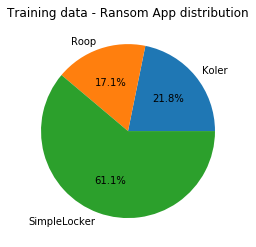

In [25]:
ransom_dict = {'Koler':46,'Roop':36,'SimpleLocker':129}
create_pie_chart(ransom_dict,'Ransom',0)

In [26]:
len(json.load(open('data/APIs/Benign_APIs.json')))

251

In [27]:
p_val = {25: 0.7778289161206292,
         50: 0.7778289161206292,75: 
         0.7778289161206292,
         100: 0.7976380733169361,
         125: 0.4726959620194806,
         150: 0.3080493247152585,
         175: 0.08891549583579257,
         200: 0.0889154958357925,
         225: 0.008038446688752003,
         250: 0.004715775125573441}

Text(0.5, 1.0, 'Effect of adding benign APIs to Malware apps')

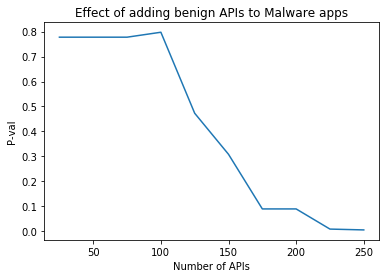

In [28]:
ax = sns.lineplot(x = list(p_val.keys()), y = list(p_val.values()))
ax.set_xlabel('Number of APIs')
ax.set_ylabel('P-val')
ax.set_title('Effect of adding benign APIs to Malware apps')

In [3]:
from scipy.sparse import load_npz

In [4]:
a_test = load_npz('data/Matrix_data/a_matrix_test.npz')

In [10]:
infused = load_npz('data/Matrix_data/a_matrix_infused.npz')

In [11]:
test_labels = pd.read_csv('data/Matrix_data/testing_labels.csv')

In [12]:
import src.create_matrices as cm

In [13]:
test_sum = a_test.sum(axis = 1)
infused_sum = infused.sum(axis = 1)

In [21]:
api_counts = pd.DataFrame(test_sum)
api_counts.columns = ['test_apis']
api_counts['infused_apis'] = infused_sum
api_counts['label'] = test_labels
api_counts['diff'] = api_counts.infused_apis - api_counts.test_apis

In [45]:
api_counts.groupby('label')['diff'].mean()

label
0.0      0.000000
1.0    236.644737
2.0    230.800000
3.0    247.000000
4.0    243.000000
Name: diff, dtype: float64

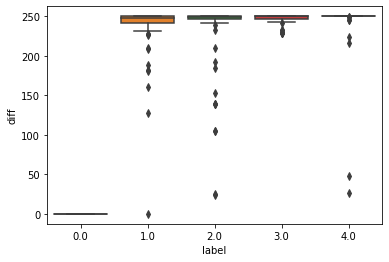

In [28]:
sns.boxplot(x = 'label', y = 'diff', data = api_counts)

In [22]:
adware = api_counts.loc[api_counts.label == 2]

In [20]:
adware['diff'].mean()

230.8

In [30]:
all_apis = json.load(open('data/APIs/All_APIs.json'))

In [39]:
s1 = set()
for x in all_apis['Benign']:
    s1.add(x[0])

In [41]:
s2 = set()
for x in all_apis['Category_1']:
    s2.add(x[0])

In [42]:
s1.intersection(s2)

set()

In [44]:
all_apis['Benign']

[['Landroid/content/pm/PackageManager;->getPackagesForUid()[Ljava/lang/String;',
  0.8378378378378378,
  0.07272727272727272,
  0.07547169811320754,
  0.004484304932735426,
  0.014218009478672985,
  0.7623661397246303],
 ['Landroid/widget/ImageView;->onMeasure()V',
  0.8153153153153153,
  0.013636363636363636,
  0.0660377358490566,
  0.0,
  0.014218009478672985,
  0.7492775794662587],
 ['Landroid/net/Uri$Builder;->authority()Landroid/net/Uri$Builder;',
  0.8738738738738738,
  0.15,
  0.14150943396226415,
  0.004484304932735426,
  0.014218009478672985,
  0.7238738738738738],
 ['Landroid/view/View;->getLocationInWindow()V',
  0.8288288288288288,
  0.10909090909090909,
  0.08018867924528301,
  0.004484304932735426,
  0.014218009478672985,
  0.7197379197379197],
 ['Landroid/net/Uri$Builder;->scheme()Landroid/net/Uri$Builder;',
  0.8873873873873874,
  0.15454545454545454,
  0.16981132075471697,
  0.008968609865470852,
  0.014218009478672985,
  0.7175760666326705],
 ['Landroid/content/pm/Pac